In [1]:
from __future__ import division
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [22]:
name = "/data/dfc13/DoublePulse/Models/Arch01/pkls/DP_model_6010.pkl"
file = pickle.load(open(name, "rb"))
print(file)

{'ArchitectureNumber': 1, 'DataDir': '/storage/work/dfc13/DoublePulse/data/', 'OutDirFilename': '/storage/work/dfc13/DoublePulse/Models/DP_model_6010', 'HyperparameterIndex': 0, 'lr': 0.01, 'epochs': 50, 'BatchSize': 32, 'ExecutionTime': 3550.7, 'NutauAsNutau': 7297, 'NueAsNutau': 4666, 'NutauAsNue': 3313, 'NueAsNue': 8724, 'NutauRecall': 0.6099640558388364, 'NueRecall': 0.7247653069701753, 'Predictions': array([[0.47470978, 0.5252902 ],
       [0.31755534, 0.6824447 ],
       [0.44315135, 0.55684865],
       ...,
       [0.74731857, 0.2526815 ],
       [0.28328985, 0.71671015],
       [0.65786666, 0.34213337]], dtype=float32), 'Labels': array([[0, 1],
       [0, 1],
       [1, 0],
       ...,
       [1, 0],
       [0, 1],
       [1, 0]])}


In [13]:
labels = file["Labels"]
preds = file["Predictions"]
print(labels[0], preds[0])

[0 1] [0.47470978 0.5252902 ]


In [63]:
data = np.column_stack((labels, preds))
print(data[0])
tot_e = len([i for i in data if i[0] == 1])
tot_t = len([i for i in data if i[1] == 1])
print(tot_e,tot_t)

[0.         1.         0.47470978 0.52529019]
12037 11963


In [64]:
len([i for i in data if ((i[0] == 1) and (i[3] >= 0))])

12037

In [65]:
cuts = np.arange(0,1,0.01)
print(cuts)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]


In [66]:
plot_data = []
for cut in cuts:
    tp = len([i for i in data if (i[1] == 1) and (i[3] >= cut)])/tot_t*100
    fp = len([i for i in data if (i[0] == 1) and (i[3] >= cut)])/tot_e*100
    plot_data.append([cut,tp,fp])
plot_data = np.stack(plot_data)

In [87]:
for i in plot_data: 
    wrt = "Cut = {0:.2f}, Nutau = {1:.1f}%, Nue = {2:.1f}%".format(i[0],i[1],100-i[2])
    print(wrt)

Cut = 0.00, Nutau = 100.0%, Nue = 0.0%
Cut = 0.01, Nutau = 100.0%, Nue = 0.1%
Cut = 0.02, Nutau = 99.9%, Nue = 0.1%
Cut = 0.03, Nutau = 99.9%, Nue = 0.2%
Cut = 0.04, Nutau = 99.9%, Nue = 0.3%
Cut = 0.05, Nutau = 99.9%, Nue = 0.3%
Cut = 0.06, Nutau = 99.8%, Nue = 0.5%
Cut = 0.07, Nutau = 99.8%, Nue = 0.7%
Cut = 0.08, Nutau = 99.8%, Nue = 1.0%
Cut = 0.09, Nutau = 99.7%, Nue = 1.2%
Cut = 0.10, Nutau = 99.6%, Nue = 1.5%
Cut = 0.11, Nutau = 99.5%, Nue = 1.9%
Cut = 0.12, Nutau = 99.4%, Nue = 2.4%
Cut = 0.13, Nutau = 99.3%, Nue = 3.0%
Cut = 0.14, Nutau = 99.1%, Nue = 3.7%
Cut = 0.15, Nutau = 98.9%, Nue = 4.7%
Cut = 0.16, Nutau = 98.6%, Nue = 5.7%
Cut = 0.17, Nutau = 98.3%, Nue = 7.0%
Cut = 0.18, Nutau = 97.9%, Nue = 8.5%
Cut = 0.19, Nutau = 97.3%, Nue = 10.2%
Cut = 0.20, Nutau = 96.7%, Nue = 12.2%
Cut = 0.21, Nutau = 96.1%, Nue = 14.4%
Cut = 0.22, Nutau = 95.3%, Nue = 16.6%
Cut = 0.23, Nutau = 94.5%, Nue = 19.2%
Cut = 0.24, Nutau = 93.5%, Nue = 21.6%
Cut = 0.25, Nutau = 92.4%, Nue = 24.2%
Cut

In [73]:
def Plot(arr1, arr2, name, bs =100):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)
    ax.set_title(name, fontsize = 14)
    ax.set_ylabel("true positive, nutaus", fontsize = 14)                                                                                                                           
    ax.set_xlabel("false positive, false nutaus", fontsize = 14)                                                   
    ax.set_xlim(0,100)
    ax.set_ylim(0,100)
    plt.plot(arr1, arr2)

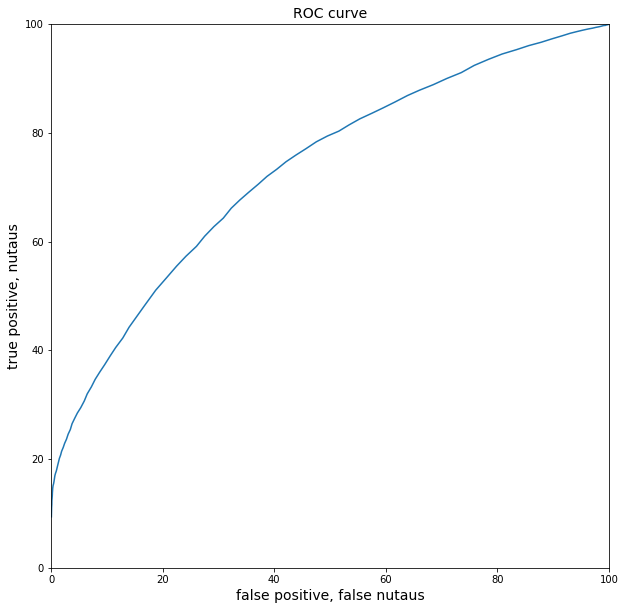

In [74]:
Plot(plot_data[:,2],plot_data[:,1], "ROC curve")

In [77]:
arr = [i for i in plot_data if (20 <= i[1] <= 25) ]
arr = np.stack(arr)
print(arr)

[[ 0.73       24.57577531  3.05724018]
 [ 0.74       23.6479144   2.75816233]
 [ 0.75       22.88723564  2.42585362]
 [ 0.76       22.15999331  2.1849298 ]
 [ 0.77       21.42439187  1.88585196]
 [ 0.78       20.74730419  1.71138988]
 [ 0.79       20.12037114  1.4870815 ]]


In [79]:
arr = [i for i in plot_data if (i[0] == 0.5) ]
arr = np.stack(arr)
print(arr)

[[ 0.5        60.99640558 27.5234693 ]]
